In [34]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## define a function to produce an axisymmetric distribution (2 half Gaussians)
def axisymm_random(centralvalue, upper_uncertainty, lower_uncertainty):
    r = random.gauss(0,1)
    rescale = 1.
    newval = centralvalue + r*upper_uncertainty
    if r<0:
        newval = centralvalue + r*lower_uncertainty
    return newval

def weighted_quantile(values, quantiles, sample_weight=None, values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of initial array
    :param old_style: if True, will correct output to be consistent with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), 'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

## some basic functions defined here
def teff_from_theta_fbol(theta, fbol):
    return (4/sigmasb)**0.25 * (fbol * 1e-8)**0.25 / (theta * au_over_pc * 1e-3)**0.5

def logg_from_numax_teff(numax, temp):
    return math.log10(fnumax * (numax/numax_sol)**alpha * (temp/Tsol)**(0.5)*solarg)

def logg_from_mass_radius(massA, rad):
    return math.log10(bigG * Msol * massA / (Rsol*rad * rad* Rsol))

def radius_from_theta_parallax():    
    return theta / parallax * ct_diam_conv

def radius_from_mass_logg(mass, gstar):
    return (bigG * mass * Msol / gstar)**(0.5) / Rsol

def mass_from_numax_rad_teff():
    newct = solarg * Tsol**(-0.5) * Rsol**2 / numax_sol**alpha / (bigG*Msol) 
    return  fnumax * newct * rad**2 * numax**alpha * temp**(0.5)

def mass_nomodel(theta, fbol, parallax, numax):
    #  Return the mass using: theta, fbol, numax, parallax
    #  we solve for M using eqns: loggmr and loggnumax
    ctA = 1./ (numax_sol ** alpha  *  Tsol**0.5)
    ctB = au_cm**2 / (Rsol**2 *  4**(7./8) * sigma_sb**(1/8))
    return ctA * ctB * fnumax * theta**1.75/parallax**2 * numax**alpha * ((fbol*1e8)**0.125)




In [41]:
#filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/Corsaro_0618/background_marginalDistribution002.txt'
filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/Corsaro_0918/background_marginalDistribution006.txt'
numaxdist = np.loadtxt(filename, skiprows=3, usecols=0)
numaxprob = np.loadtxt(filename, skiprows=3, usecols=1)
numaxdist[0],numaxprob[0]

(2.50713401, 1.563583674e-16)

In [53]:
### constants 
Rsol = 6.957e+10 #;cm 
Lsol = 3.828e+26 #;W
Msol = 1.98855e33#; g   1.98855\pm 0.00025 e30 kg (NIST) 
sigmasb = 5.670373e-5 #erg/s/cm2/t4  ;
au_over_pc = 1./206264.81 #constant to convert R/d to theta/2  ... note this is AU/2Rsol .. not pc
ct_teff_conv = (4./sigmasb)**0.25 #the 4 comes from half the diameter^2
ct_diam_conv = 107.505 #
bigG = 6.67408e-8 #cgs units  \pm 0.00031 E-11 m 3 kg-1 s-2 ).
Tsol = 5772. # iau
solarg = bigG * Msol/ (Rsol * Rsol)
numax_sol = 3050. #140.#3050. #
alpha = 1.0
#totalct = ct_diam_conv**2 / bigG / numax_sol**alpha / Tsol**0.5 * \
#    ( 4 * au_over_pc /sigmasb / 0.001)**0.25
au = 1.49597870700e11 #in m
au_cm = au * 1e2 #;in c
sigma_sb = 5.670373e-5

### parameters with uncertainties
#filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/Corsaro_0618/background_marginalDistribution002.txt'
#numaxprob = np.loadtxt(filename, skiprows=4, usecols=1)
filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/Corsaro_0918/background_marginalDistribution006.txt'
numaxdist = np.loadtxt(filename, skiprows=3, usecols=0)
numaxprob = np.loadtxt(filename, skiprows=3, usecols=1)
filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/Corsaro_0918/background_parameter006.txt'
pardist = np.loadtxt(filename, usecols=0)

alpha = 1.00
fnumax = 1.0 # or 1.02 from Sharma et al. 2016
parallax = 3.444 # +_0.063
eparallax = 0.063
numax, enumax, enumaxBig, enumaxSmall = 3.07, 0.05, 0.05, 0.04 # +
#numax, enumax, enumaxBig, enumaxSmall = 3.09, 0.01, enumax, enumax
thetaA = 0.940 # 0.011  
thetaB = 0.926
etheta = 0.011
fbolA, efbolA = 13.16, 0.36  # +-0.36  includes Av=0.01 mag
fbolAv, efbolAv = 13.85, 0.31  # +-0.36  includes Av=0.08 mag
fbolB, efbolB = 13.20, 0.29 # +-0.29  includes E(B-V) = 0.003 mag following Creevey et al. 2012
fbolBv, efbolBv = 13.72, 0.31 # +-0.29  Av = 0.08mag
numaxstats = weighted_quantile(numaxdist, [0.16,0.5,0.84], sample_weight = numaxprob)
#numaxstats = weighted_quantile(pardist, [0.16,0.5,0.84])#, sample_weight = numaxprob)
numax, enumaxBig, enumaxSmall = numaxstats[1], numaxstats[2]-numaxstats[1], numaxstats[1]-numaxstats[0]
enumax = enumaxBig
print('statistics from numax distribution: ', numax, enumaxBig, enumaxSmall)

#fbolA, efbolA = 13.3, 0.30  # +-0.36  includes Av=0.01 mag
#fbolB, efbolB = 13.18, 0.30 # +-0.29  includes E(B-V) = 0.003 mag following Creevey et al. 2012

fbol, efbol, theta = fbolB, efbolB, thetaB
fbol, efbol, theta = fbolA, efbolA, thetaA
## dummy values
massA = 0.865

fnumax, alpha =  1.0, 1.0

#fnumax, alpha =  1.0, 0.98
#fnumax, alpha = 1.1, 1.0 


temp = teff_from_theta_fbol(theta, fbol)
lgnu = logg_from_numax_teff(numax, temp)
rad = radius_from_theta_parallax()
print('solar log g',logg_from_mass_radius(1.,1.))
print('teff and logg from nu: ',temp, lgnu)
print('mass from numax, rad, teff: ', mass_from_numax_rad_teff())
print('mass from thetaB, parallax, numax: ',mass_nomodel(thetaB, fbolB, parallax, numax)) #theta, fbol, parallax, numax))
print('mass from thetaA, parallax, numax: ',mass_nomodel(thetaA, fbolA, parallax, numax)) #theta, fbol, parallax, numax))


statistics from numax distribution:  3.0623205702072345 0.020232166151784803 0.019773494714287576
solar log g 4.438083916717306
teff and logg from nu:  4598.06077112579 1.3904589212210492
mass from numax, rad, teff:  0.7715458741165735
mass from thetaB, parallax, numax:  0.6274876824417416
mass from thetaA, parallax, numax:  0.6439393530309934


## These are the figures

### Time series figures

Text(0,0.5,'RV [km s$^{-1}$]')

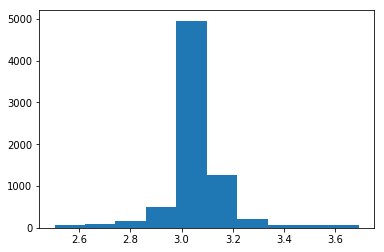

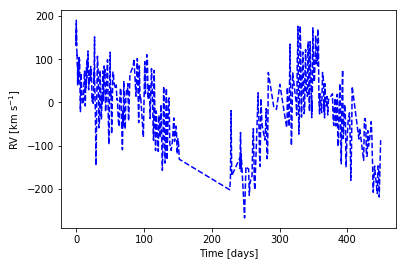

In [50]:
import pylab as plb
filename = '/home/ocreevey/research/articles/hd122563/Frequency_Analysis/corsaro_original/HD122563_RV_org_outliers.dat'
timeo = np.loadtxt(filename, usecols = 0) # time - time(0)
rvelo = np.loadtxt(filename, usecols = 1) # rv
erveo = np.loadtxt(filename, usecols = 2) # errors
plt.hist(pardist)
#plt.figure(figsize=(18, 6))
#f2 = plt.subplot(121)

fig, ax = plt.subplots()
#f=plt.figure(1, figsize=(18,8))
plt.plot(timeo,rvelo - np.mean(rvelo), color = 'b', ls='dashed')
#plt.xlim(0,150)
ax.set_xlabel('Time [days]')
ax.set_ylabel('RV [km s$^{-1}$]')
#f2=plt.figure(2, figsize=(18,8))

#f2 = plt.figure(2,figsize=(18,8))
#plt.plot(timeo,rvelo - np.mean(rvelo), color = 'b', ls='dashed')
#plt.xlim(100,300)


#plt.plot(timef,rvelf, color = 'r')


Text(0,0.5,'RV [km s$^{-1}$]')

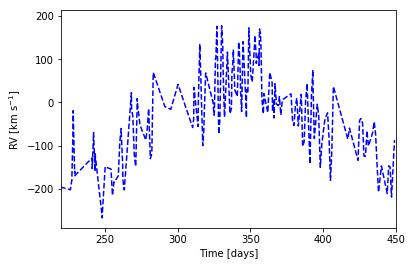

In [28]:
fig, ax = plt.subplots()
#f=plt.figure(1, figsize=(18,8))
plt.plot(timeo,rvelo - np.mean(rvelo), color = 'b', ls='dashed')
plt.xlim(220,450)
ax.set_xlabel('Time [days]')
ax.set_ylabel('RV [km s$^{-1}$]')

Distance_K18 [307.77898033]
logg_nu_A [1.39049248] 1.3927771039022463
logg_nu_B [1.39215514] 1.3945665049395775
logg_nu_C [1.3864965] 1.3889078648615287
logg_nu_D [1.40075531] 1.403166676701495


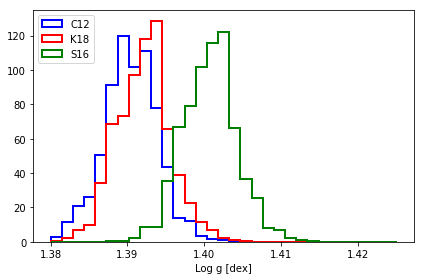

In [58]:
# distribution of logg from the simulations
fbol, efbol, theta, etheta = fbolA, efbolA, thetaA, etheta
numax_sol = 3050. #140.#3050. #
mass, emass = 0.85, 0.05
fnumax = 1.00
#numax_i = [axisymm_random(numax, enumaxBig, enumaxSmall) for i in range(10_000)]
theta_A = [theta + random.gauss(0,1) * etheta for i in range(10_000)]
fbol_A  = [fbol  + random.gauss(0,1) * efbol for i in range(10_000)]
mass_i  = [mass  + random.gauss(0,1) * emass for i in range(10_000)]
z = zip(theta_A, fbol_A)
temp_A = [teff_from_theta_fbol(thetai, fboli) for thetai, fboli in z]
z2 = zip(numaxdist, temp_A)
logg_nu_A = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_A)
radius_A = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_A, theta_A)
distance_A = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_A, temp_A)
luminosity_A = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]



# repeat for B without changing anything else
fbol, efbol, theta, etheta = fbolB, efbolB, thetaB, etheta

theta_B= [theta + random.gauss(0,1) * etheta for i in range(10_000)]
fbol_B  = [fbol  + random.gauss(0,1) * efbol for i in range(10_000)]
z = zip(theta_B, fbol_B)
temp_B = [teff_from_theta_fbol(thetai, fboli) for thetai, fboli in z]
z2 = zip(numaxdist, temp_B)
logg_nu_B = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_B)
radius_B = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_B, theta_B)
distance_B = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_B, temp_B)
luminosity_B = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]

print('Distance_K18',weighted_quantile(distance_B, [0.50],sample_weight = numaxprob))

# repeat for B by changing numax_sol
numax_sol = 3090.

z2 = zip(numaxdist, temp_B)
logg_nu_C = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_C)
radius_C = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_C, theta_B)
distance_C = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_C, temp_B)
luminosity_C = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]

# repeat for B by changing numax_sol
numax_sol = 3050
fnumax = 1.02
z2 = zip(numaxdist, temp_B)
logg_nu_D = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_D)
radius_D = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_D, theta_B)
distance_D = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_D, temp_B)
luminosity_D = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]

print('logg_nu_A',weighted_quantile(logg_nu_A, [0.50],sample_weight = numaxprob),np.mean(logg_nu_A))
print('logg_nu_B',weighted_quantile(logg_nu_B, [0.50],sample_weight = numaxprob),np.mean(logg_nu_B))
print('logg_nu_C',weighted_quantile(logg_nu_C, [0.50],sample_weight = numaxprob),np.mean(logg_nu_C))
print('logg_nu_D',weighted_quantile(logg_nu_D, [0.50],sample_weight = numaxprob),np.mean(logg_nu_D))


xrange = [1.38, 1.425]
nbins = 31
fig, ax = plt.subplots()
f=plt.figure(1, figsize=(12,8))
n, bins, patches = ax.hist(logg_nu_A, bins = nbins, color = 'b',lw = 2,alpha=1.0, label = 'C12', \
                           weights = numaxprob, normed=1, histtype='step', range=xrange)
plt.hist(logg_nu_B, bins = nbins, color='r', weights = numaxprob, range=xrange, alpha=1.0, lw = 2,label = 'K18', normed=1, histtype='step')
plt.hist(logg_nu_D, bins = nbins, color='g', weights = numaxprob, range=xrange, alpha=1.0, lw =2, label = 'S16', normed=1, histtype='step')
plt.legend(loc='upper left')
ax.set_xlabel('Log g [dex]')
#ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
fig.tight_layout()
plt.show()
f.savefig("loggdist.eps", bbox_inches='tight')
f.savefig("loggdist.png")
#plt.figure(1, figsize=(12,8))
#handles, labels = ax.get_legend_handles_labels()
#ax1 = plt.subplot(111)
#n, bins, patch = plt.hist(logg_nu_A, 61, alpha=0.5, label = 'C12')
#n, bins, patch = plt.hist(logg_nu_B, 61, facecolor='b', alpha=0.5, label = 'K18')
#plt.hist([logg_nu_A, logg_nu_B], bins = 61, alpha=0.5, label = ['C12', 'K18'])
#plt.legend(loc='upper right')
#plt.hist(logg_nu_A, bins = 61, facecolor='b', alpha=0.5, label = 'C12')

#plt.hist(logg_nu_A, bins = 51, color = 'g',lw = 3,alpha=1.0, label = 'C12', normed=1, histtype='step')
#plt.hist(logg_nu_B, bins = 51, color='r', alpha=1.0, lw = 3,label = 'K18', normed=1, histtype='step')
#plt.hist(logg_nu_D, bins = 51, color='b', alpha=1.0, lw =3, label = 'S16', normed=1, histtype='step')


In [59]:
## Values for the text
#perA, perB, perD = np.percentile([logg_nu_A, logg_nu_B, logg_nu_D],[16,50,84])
perA = weighted_quantile(logg_nu_A,[0.16,0.50,0.84], sample_weight = numaxprob)
perB = weighted_quantile(logg_nu_B,[.16,.50,.84], sample_weight = numaxprob)
perD = weighted_quantile(logg_nu_D,[.16,.50,.84], sample_weight = numaxprob)

print('log g results')
print(perA[1],perA[2]-perA[0])
print(perB[1],perB[2]-perB[0])
print(perD[1],perD[2]-perD[0])
print(perB[1],perB[1] - perB[[0,2]])

print('Radius results')
perB = weighted_quantile(radius_B,[.16,.50,.84], sample_weight = numaxprob)
perA = weighted_quantile(radius_A,[.16,.50,.84], sample_weight = numaxprob)#np.percentile(radius_A,[16,50,84])
perD = weighted_quantile(radius_D, [.16,.50,.84], sample_weight = numaxprob)

print(perA,perB,perD)

print('')
print('*********************')
print('Results for paper based on C12')
pars = [logg_nu_A, radius_A, distance_A, luminosity_A]
parnames = ['logg', 'radius', 'distance', 'luminosity']
#forma = [3.3f,5.2f,3.3f,4.1f]
zinfo = zip(pars,parnames)#,forma)
for pi,pni in zinfo:
    perB = weighted_quantile(pi,[0.16,0.50,0.84], sample_weight = numaxprob)
#    print(f"{pni:<10} : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")
    print(f"{pni:<10} : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")
print('')
print('*********************')
print('Results for paper based on K18')
pars = [logg_nu_B, radius_B, distance_B, luminosity_B]
zinfo = zip(pars,parnames)
for pi,pni in zinfo:
    perB = weighted_quantile(pi,[0.16,0.50,0.84], sample_weight = numaxprob)
    print(f"{pni:<10} wtd : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")
#    perB = np.percentile(pi,[16,50,84]) #, sample_weight = numaxprob)
#    print(f"{pni:<10} : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")



log g results
1.3904924824791427 0.006512814643279574
1.3921551371415344 0.006810312864960366
1.4007553089034521 0.006810312864960366
1.3921551371415344 [ 0.00364617 -0.00316414]
Radius results
[29.82398309 30.76115672 31.52616773] [29.79179039 30.70302814 31.48122545] [29.49826806 30.40052787 31.17105803]

*********************
Results for paper based on C12
logg       : 1.390 + 0.003 -  0.003
radius     : 30.761 + 0.765 -  0.937
distance   : 304.094 + 9.358 -  9.970
luminosity : 379.428 + 24.670 -  24.856

*********************
Results for paper based on K18
logg       wtd : 1.392 + 0.003 -  0.004
radius     wtd : 30.703 + 0.778 -  0.911
distance   wtd : 307.779 + 9.157 -  9.607
luminosity wtd : 389.552 + 25.107 -  25.958


*********************
Results for paper based on Gaia+C12
logg       : 1.432 + 0.031 -  0.032
radius     : 29.338 + 0.632 -  0.619
distance   : 290.330 + 5.286 -  5.161
luminosity : 346.315 + 16.266 -  15.168

*********************
Results for paper based on Gaia+C12
logg       : 1.445 + 0.031 -  0.032
radius     : 28.905 + 0.643 -  0.614
distance   : 290.330 + 5.286 -  5.161
luminosity : 347.602 + 15.182 -  14.333


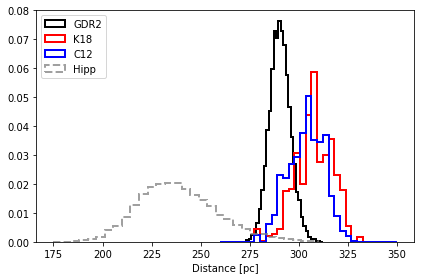

In [60]:
## Now the figure with the Gaia distance
px_hipp, epx_hipp = 4.22, 0.35
px_gaia, epx_gaia = 3.444, 0.063

distance_gaia = [1e3/(px_gaia + epx_gaia * random.gauss(0,1)) for i in range(10_000)]
distance_hipp = [1e3/(px_hipp + epx_hipp * random.gauss(0,1)) for i in range(10_000)]

## Gaia results
zga = zip(theta_A, distance_gaia)
zgb = zip(theta_B, distance_gaia)
radius_GA = [thetai * gaiai / 1e3 * ct_diam_conv for thetai,gaiai in zga]
radius_GB = [thetai * gaiai / 1e3 * ct_diam_conv for thetai,gaiai in zgb]
zga = zip(mass_i, radius_GA)
zgb = zip(mass_i, radius_GB)
gstar_GA = [logg_from_mass_radius(massi, radi) for massi, radi in zga]
gstar_GB = [logg_from_mass_radius(massi, radi) for massi, radi in zgb]
zga = zip(radius_GA,  temp_A)
zgb = zip(radius_GB,  temp_B)
luminosity_GA = [radi**2 * (teffi/Tsol)**4 for radi, teffi in zga]
luminosity_GB = [radi**2 * (teffi/Tsol)**4 for radi, teffi in zgb]

#print(np.mean(distance_gaia))
#print(np.mean(radius_GA), np.std(radius_GA),
#      np.mean(radius_GB), np.std(radius_GB))
#print('logg GA',np.percentile(gstar_GA,[16,50,84]), np.std(gstar_GA),
#      'logg GB',np.percentile(gstar_GB,[16,50,84]),np.std(gstar_GB))
#print('radius GA',np.percentile(radius_GA,[16,50,84]), np.std(gstar_GA),
#      'radius GB',np.percentile(radius_GB,[16,50,84]),np.std(gstar_GB))
#print(np.mean(luminosity_GA),np.mean(luminosity_GB))
print('*********************')
print('Results for paper based on Gaia+C12')
pars = [gstar_GA, radius_GA, distance_gaia, luminosity_GA]
parnames = ['logg', 'radius', 'distance', 'luminosity']
zinfo = zip(pars,parnames)
for pi,pni in zinfo:
    perB = weighted_quantile(pi,[0.16,0.50,0.84])
    print(f"{pni:<10} : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")
print('')
print('*********************')
print('Results for paper based on Gaia+C12')
pars = [gstar_GB, radius_GB, distance_gaia, luminosity_GB]
parnames = ['logg', 'radius', 'distance', 'luminosity']
zinfo = zip(pars,parnames)
for pi,pni in zinfo:
    perB = weighted_quantile(pi,[0.16,0.50,0.84])
    print(f"{pni:<10} : {perB[1]:3.3f} + {perB[2] - perB[1]:3.3f} -  {perB[1] - perB[0]:3.3f}")


## figure showing the different distances
fig, ax = plt.subplots()
#logg_from_numax_teff()
f=plt.figure(1, figsize=(12,8))
xrange=[260,350]
n, bins, patches = ax.hist(distance_gaia, bins = 31, color = 'k',lw = 2,alpha=1.0, label = 'GDR2', histtype='step', normed=1)
plt.hist(distance_B, bins = 31, range=xrange,color='r', alpha=1.0, lw = 2,label = 'K18', histtype='step', weights=numaxprob, normed=1)
plt.hist(distance_A, bins = 31, range=xrange,color='b', alpha=1.0, lw = 2,label = 'C12', histtype='step', weights=numaxprob, normed=1)
plt.hist(distance_hipp, bins = 31, range=[175,310],color='gray', alpha=0.75, lw =2, ls = 'dashed',label = 'Hipp', histtype='step', normed=1)
plt.legend(loc='upper left')
ax.set_xlabel('Distance [pc]')
#ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
fig.tight_layout()
plt.show()
f.savefig("distance.eps", bbox_inches='tight')
f.savefig("distance.jpg")

In [8]:
# open evolution tracks for reading
filename = '/home/ocreevey/gaia/basti/MS/scaled_solar_canonical/Z14/0075z104y245s.nor'
#filename = '/home/ocreevey/gaia/basti/MS/solar_non_canonical/Z14/0075z104y245s.nor'
#filename = '/home/ocreevey/gaia/basti/MS/alpha-non_canonical/Z14/0075z104y245aes.nor'
#filename = '/home/ocreevey/gaia/basti/MS/alpha_canonical/Z14/0075z104y245aes.nor'
lglum_75 = np.loadtxt(filename, skiprows=4, usecols=1)
lgtef_75 = np.loadtxt(filename, skiprows=4, usecols=2)
filename = '/home/ocreevey/gaia/basti/MS/scaled_solar_canonical/Z14/0090z104y245s.nor'
#filename = '/home/ocreevey/gaia/basti/MS/solar_non_canonical/Z14/0090z104y245s.nor'
#filename = '/home/ocreevey/gaia/basti/MS/alpha-non_canonical/Z14/0090z104y245aes.nor'
#filename = '/home/ocreevey/gaia/basti/MS/alpha_canonical/Z14/0090z104y245aes.nor'
lglum_90 = np.loadtxt(filename, skiprows=4, usecols=1)
lgtef_90 = np.loadtxt(filename, skiprows=4, usecols=2)
filename = '/home/ocreevey/research/articles/hd122563/Modeles/olc_smooth.tracks'
lum_cesam = np.loadtxt(filename, usecols=1)
tef_cesam = np.loadtxt(filename, usecols=0)
lglum_cesam = np.log10(lum_cesam)
lgtef_cesam = np.log10(tef_cesam)

In [ ]:
# redo calculation with AV = 0.03 mag

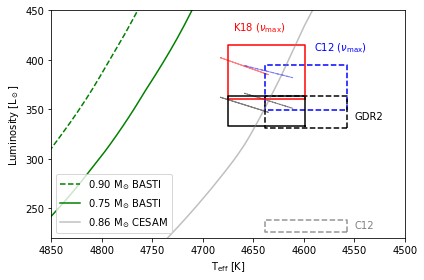

In [9]:
## results to show
#old results (grey dashed)
#temp_A, luminosity_A (blue dashed)
#temp_B, luminosity_B (?, red)
#temp_D, luminosity_D (green)
#temp_A, luminosity_GA (black dashed)
#temp_B, luminosity_GB (black)
th, eth = [4598, 41]
lm, elm = [232, 6]
xH =  [th-eth, th-eth, th+eth, th+eth, th-eth ]#eth*[-1,-1,1,1,-1]
yH = [lm-elm, lm+elm, lm+elm, lm - elm, lm - elm]

perx = weighted_quantile(temp_A, [0.16,0.84])#, sample_weight=numaxprob)
#np.percentile(temp_A,[16,84])
pery = weighted_quantile(luminosity_A, [0.16,0.84], sample_weight=numaxprob)
#pery = np.percentile(luminosity_A,[16,84])
xA = perx[[0,0,1,1,0]]
yA = pery[[0,1,1,0,0]]
pery = weighted_quantile(luminosity_GA, [0.16,0.84])#, sample_weight=numaxprob)
#pery = np.percentile(luminosity_GA,[16,84])
xGA = xA#perx[[0,0,1,1,0]]
yGA= pery[[0,1,1,0,0]]

perx = weighted_quantile(temp_B, [0.16,0.84])#, sample_weight=numaxprob)
pery = weighted_quantile(luminosity_B, [0.16,0.84], sample_weight=numaxprob)
xB =perx[[0,0,1,1,0]]
yB = pery[[0,1,1,0,0]]
#temp_A, luminosity_GA (black dashed)
pery = np.percentile(luminosity_GB,[16,84])
xGB = xB
yGB = pery[[0,1,1,0,0]]

fig, ax = plt.subplots()

f=plt.figure(1, figsize=(12,8))
n#tef, etef, lum, elum = []
plt.plot(xA,yA, color = 'b', ls='dashed')
plt.plot(xGA,yGA, color = 'k', ls = 'dashed')
plt.plot(xB,yB, color = 'r')
plt.plot(xGB,yGB, color = 'k')
plt.plot(xH,yH,color='grey',alpha=0.85,ls='dashed')
maxnum = 1200
plt.plot(10**lgtef_90[:maxnum],10**lglum_90[:maxnum], color='g',ls='dashed',label=r'0.90 M$_{\odot}$ BASTI')
plt.plot(10**lgtef_75[:maxnum],10**lglum_75[:maxnum],color='g',label=r'0.75 M$_{\odot}$ BASTI')
plt.plot(10**lgtef_cesam,10**lglum_cesam,color='grey',alpha=0.5,label=r'0.86 M$_{\odot}$ CESAM')

plt.text(4550, 340, r'GDR2', fontsize=10)
plt.text(4550, 230, r'C12', fontsize=10, color='k', alpha=0.5)
plt.text(4590, 410, r'C12 ($\nu_{\rm max}$)', fontsize=10, color='b')
plt.text(4670,430, r'K18 ($\nu_{\rm max}$)', fontsize=10, color='r')

plt.arrow(4611,382,47,12,head_width=0.5, head_length=1., color='b', ls='dashed', alpha = 0.5, label=r'A_V = 0.08 [mag]') # these values are obtained by using the "new FBol_A" and "Fbol_AV"
plt.arrow(4635,385,47,17,head_width=0.5, head_length=1., color='r', alpha=0.5) # these values are obtained by using the "new FBol_A" and "Fbol_AV"
plt.arrow(4611,351,47,15,head_width=0.5, head_length=1., color='k', alpha=0.5, ls='dashed') # these values are obtained by using the "new FBol_A" and "Fbol_AV"
plt.arrow(4635,347,47,15,head_width=0.5, head_length=1., color='k', alpha=0.5) # these values are obtained by using the "new FBol_A" and "Fbol_AV"

#hange in L, T for asteroseismic results
#4611,  47
#4635,  47
# 382,  12
# 385,  17
#**********************
#change in L, T for Gaia results
#4611,  47
# 351,  15
#4635,  47
# 347,  15
plt.ylabel(r'Luminosity [L$_\odot$]')
plt.xlabel(r'T$_{\rm eff}$ [K]')
plt.axis([4850,4500,220,450])
plt.legend(loc='lower left')
fig.tight_layout()
plt.show()
f.savefig("hrdiag.eps", bbox_inches='tight')
f.savefig("hrdiag.png")


[4850, 4500, 220, 450]

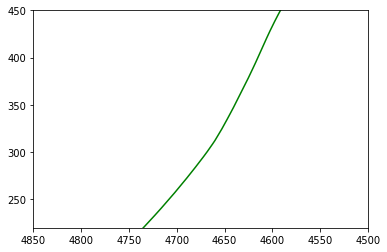

In [10]:
numax, enumaxBig, enumaxSmall
plt.plot(tef_cesam,lum_cesam,color='g',label=r'0.86 M$_{\odot}$')
plt.axis([4850,4500,220,450])


In [11]:
## HR diagram part
# repeat simulations for A/B by changing Av = 0.06, this means adding 0.6 to fbol
fnumax = 1.00
numax_sol = 3050.

fbol_AAv  = [fbolAv  + random.gauss(0,1) * efbol for i in range(10_000)]
z = zip(theta_A, fbol_AAv)
temp_AAv = [teff_from_theta_fbol(thetai, fboli) for thetai, fboli in z]
z2 = zip(numaxdist, temp_AAv)
logg_nu_AAv = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_AAv)
radius_AAv = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_AAv, theta_A)
distance_AAv = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_AAv, temp_AAv)
luminosity_AAv = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]

fbol_BAv  = [fbolBv  + random.gauss(0,1) * efbol for i in range(10_000)]
z = zip(theta_B, fbol_BAv)
temp_BAv = [teff_from_theta_fbol(thetai, fboli) for thetai, fboli in z]
z2 = zip(numaxdist, temp_BAv)
logg_nu_BAv = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z3 = zip(mass_i, logg_nu_BAv)
radius_BAv = [radius_from_mass_logg(massi, 10**gnu) for massi, gnu in z3]
z4 = zip(radius_AAv, theta_B)
distance_BAv = [radiusi * 1e3 / ct_diam_conv / thetai for radiusi, thetai in z4]
z5 = zip(radius_AAv, temp_BAv)
luminosity_BAv = [radiusi**2 * (teffi/Tsol)**4 for radiusi, teffi in z5]

## for gaia distance
zga = zip(radius_GA,  temp_AAv)
zgb = zip(radius_GB,  temp_BAv)
luminosity_GAv = [radi**2 * (teffi/Tsol)**4 for radi, teffi in zga]
luminosity_GBv = [radi**2 * (teffi/Tsol)**4 for radi, teffi in zgb]

print('change in L, T for asteroseismic results')
pars1 = [temp_A,temp_B]
pars2 = [temp_AAv,temp_BAv]
zinfo = zip(pars1,pars2)
for pi1,pi2 in zinfo:
    perB = weighted_quantile(pi1, .50)#, sample_weight=numaxprob)
    perB2 = weighted_quantile(pi2, .50)#, sample_weight=numaxprob)
    print(f'{perB:4.0f},{perB2-perB:4.0f}')
pars1 = [luminosity_A,luminosity_B]
pars2 = [luminosity_AAv, luminosity_BAv]
zinfo = zip(pars1,pars2)
for pi1,pi2 in zinfo:
    perB = weighted_quantile(pi1, .50, sample_weight=numaxprob)
    perB2 = weighted_quantile(pi2, .50, sample_weight=numaxprob)
    print(f'{perB:4.0f},{perB2-perB:4.0f}')
    
    
print('**********************')
print('change in L, T for Gaia results')
pars1=[temp_A,luminosity_GA,temp_B,luminosity_GB]
pars2=[temp_AAv,luminosity_GAv,temp_BAv,luminosity_GBv]
zinfo = zip(pars1,pars2)
for pi1,pi2 in zinfo:
    perB = weighted_quantile(pi1, .50)#, sample_weight=numaxprob)
    perB2 = weighted_quantile(pi2, .50)#, sample_weight=numaxprob)
    print(f'{perB:4.0f},{perB2-perB:4.0f}')

#print(np.percentile(luminosity_GA,50),np.percentile(temp_A,50))
#print(np.percentile(luminosity_GAv,50),np.percentile(temp_AAv,50))
#print(np.percentile(luminosity_GB,50),np.percentile(temp_B,50))
#print(np.percentile(luminosity_GBv,50),np.percentile(temp_BAv,50))


change in L, T for asteroseismic results
4598,  59
4636,  45
 376,  16
 389,  14
**********************
change in L, T for Gaia results
4598,  59
 347,  18
4636,  45
 348,  13


4486 4486


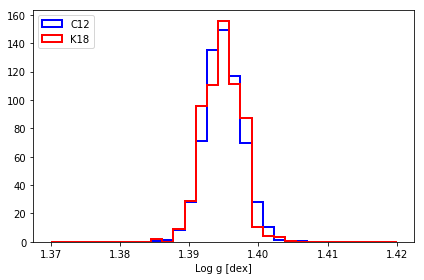

numax_wtd:  [3.08175995 3.09325263 3.10729097]
logg_wtd:  [1.39215224 1.39484441 1.39748597]
numax_simul:  [3.08230021 3.09334223 3.10723304]
numax_simul:  [3.08230267 3.09334223 3.10722079]
logg_simul:  [1.39241083 1.39494947 1.39760048]


In [12]:
print(numaxdist.size,numaxprob.size)
nsimulations = np.size(numaxprob)

fbol, efbol, theta, etheta = fbolA, efbolA, thetaA, etheta
numax_sol = 3050. #140.#3050. #
mass, emass = 0.85, 0.05

numax_i = [axisymm_random(numax, enumaxBig, enumaxSmall) for i in range(nsimulations)]
theta_A = [theta + random.gauss(0,1) * etheta for i in range(nsimulations)]
fbol_A  = [fbol  + random.gauss(0,1) * efbol for i in range(nsimulations)]
mass_i  = [mass  + random.gauss(0,1) * emass for i in range(nsimulations)]

z = zip(theta_A, fbol_A)
temp_A = [teff_from_theta_fbol(thetai, fboli) for thetai, fboli in z]
z2 = zip(numax_i, temp_A)
logg_nu_A = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z2]
z22 = zip(numaxdist, temp_A)
logg_nu_A2 = [logg_from_numax_teff(numaxi, tempi) for numaxi, tempi in z22]

fig, ax = plt.subplots()
f2=plt.figure(1, figsize=(12,8))
n, bins, patches = ax.hist(logg_nu_A, bins = 31, color = 'b',lw = 2,alpha=1.0, label = 'C12', \
                           normed=1, histtype='step', range=[1.37,1.42])
plt.hist(logg_nu_A2, bins = 31, range = [1.37, 1.42], weights = numaxprob , \
         color='r', alpha=1.0, lw = 2,label = 'K18', histtype='step', normed = 1)
plt.legend(loc='upper left')
ax.set_xlabel('Log g [dex]')
fig.tight_layout()
plt.show()

print('numax_wtd: ',weighted_quantile(numaxdist, [0.16,0.5,0.84], sample_weight = numaxprob))
print('logg_wtd: ',weighted_quantile(logg_nu_A2, [0.16,0.5,0.84], sample_weight = numaxprob))
print('numax_simul: ',weighted_quantile(numax_i, [0.16,0.5,0.84]))
print('numax_simul: ',np.percentile(numax_i, [16,50,84]))

print('logg_simul: ',np.percentile(logg_nu_A, [16,50,84]))

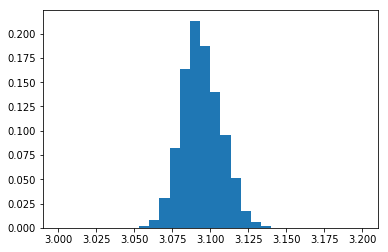

In [13]:
p=plt.hist(numaxdist, bins=30, weights=numaxprob, range = [3.0, 3.2])
#np.percentile(Counter(dict(zip(numaxdist, numaxprob)).elements()), 50)

In [14]:
data = (random.randint(-3,100) for i in range(1_000_000))  # now its 
data_log = (math.log(d) for d in data if d>0)
sum(data_log)

3497751.9971536715

In [15]:
weighted_quantile(numaxdist, [0.16,0.5,0.84], sample_weight = numaxprob)

array([3.08175995, 3.09325263, 3.10729097])